In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df=pd.read_csv('../dataset2.csv',sep=',',encoding='cp437')

In [6]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [17]:
df[df['SARS-Cov-2 exam result']=='negative']['Hemoglobin'].isna().sum()

4566

In [4]:
y=pd.read_csv('predictors.csv')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X=pd.read_csv('features.csv')
X.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,1.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,...,0,0,0,0,0,0,0,0,0,0
1,18.0,-0.427254,-0.648900,0.876948,-0.886869,0.031483,-0.577184,-1.050367,0.347854,-0.223767,...,0,0,0,0,0,0,0,0,0,0
2,0.0,-0.816359,-0.586244,1.605533,0.235063,-0.197712,-0.764823,0.742040,1.959090,-0.223767,...,0,0,0,0,0,0,0,0,0,0
3,13.0,-1.045245,-1.150148,0.776453,-0.999063,-1.273164,0.497476,-0.751633,0.509256,2.525365,...,0,0,0,0,0,0,0,0,0,0
4,11.0,0.785841,1.168124,-0.002379,0.908221,0.913001,-0.184848,1.538664,0.325591,0.081693,...,0,0,0,0,0,0,0,0,0,0


In [7]:
features=list(X.columns)
features

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentrationá(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2']

In [8]:
scaler = StandardScaler()
print(scaler.fit(X[features]))
X_scaled=scaler.transform(X[features])
X_scaled

StandardScaler()


array([[-2.04261497, -1.79043893, -0.92511076, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 1.09843124, -0.5220598 , -0.78404173, ...,  0.        ,
        -0.06804138,  0.        ],
       [-2.22738239, -0.95330889, -0.71350681, ...,  0.        ,
        -0.06804138,  0.        ],
       ...,
       [ 1.09843124,  1.48145393,  1.51074243, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 0.91366382, -0.01239174, -0.04829538, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 1.01058465,  0.48347227,  0.35490409, ...,  0.        ,
        -0.06804138,  0.        ]])

In [9]:

X_scaled=scaler.transform(X[features])
X_scaled

array([[-2.04261497, -1.79043893, -0.92511076, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 1.09843124, -0.5220598 , -0.78404173, ...,  0.        ,
        -0.06804138,  0.        ],
       [-2.22738239, -0.95330889, -0.71350681, ...,  0.        ,
        -0.06804138,  0.        ],
       ...,
       [ 1.09843124,  1.48145393,  1.51074243, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 0.91366382, -0.01239174, -0.04829538, ...,  0.        ,
        -0.06804138,  0.        ],
       [ 1.01058465,  0.48347227,  0.35490409, ...,  0.        ,
        -0.06804138,  0.        ]])

In [10]:
X_numerical=[column for column,dtype in X.dtypes.iteritems() if dtype =='float64']

C:\Users\DELL\AppData\Local\Temp\ipykernel_17916\3485578906.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  X_numerical=[column for column,dtype in X.dtypes.iteritems() if dtype =='float64']


In [11]:
X_numerical

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentrationá(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium']

In [12]:
X_numerical_df=X[X_numerical]
X_numerical_df.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium
0,1.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,...,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132
1,18.0,-0.427254,-0.648900,0.876948,-0.886869,0.031483,-0.577184,-1.050367,0.347854,-0.223767,...,-0.666950,-0.915404,-0.193981,-0.536617,0.831401,0.304858,0.445824,-1.321708,-0.058626,-0.215628
2,0.0,-0.816359,-0.586244,1.605533,0.235063,-0.197712,-0.764823,0.742040,1.959090,-0.223767,...,0.133698,-1.175789,0.462600,-0.713529,0.610141,-0.588343,0.719634,-1.776593,0.633426,-0.143752
3,13.0,-1.045245,-1.150148,0.776453,-0.999063,-1.273164,0.497476,-0.751633,0.509256,2.525365,...,2.914897,0.787108,-0.299034,-0.182790,-0.938685,-0.737209,-0.438793,-0.322340,-1.294433,-0.215628
4,11.0,0.785841,1.168124,-0.002379,0.908221,0.913001,-0.184848,1.538664,0.325591,0.081693,...,-0.540532,-0.454724,-0.115191,-0.448160,0.380685,0.230425,0.913169,0.229035,0.633426,0.431256


In [13]:
X.dtypes

Patient age quantile                                float64
Hematocrit                                          float64
Hemoglobin                                          float64
Platelets                                           float64
Mean platelet volume                                float64
Red blood Cells                                     float64
Lymphocytes                                         float64
Mean corpuscular hemoglobin concentrationá(MCHC)    float64
Leukocytes                                          float64
Basophils                                           float64
Mean corpuscular hemoglobin (MCH)                   float64
Eosinophils                                         float64
Mean corpuscular volume (MCV)                       float64
Monocytes                                           float64
Red blood cell distribution width (RDW)             float64
Neutrophils                                         float64
Urea                                    

In [14]:
X_caregorical=[column for column,dtype in X.dtypes.iteritems() if dtype =='int64']

C:\Users\DELL\AppData\Local\Temp\ipykernel_17916\1601103535.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  X_caregorical=[column for column,dtype in X.dtypes.iteritems() if dtype =='int64']


In [15]:
X_categorical_df=X[X_caregorical]

In [16]:
X_numerical_df.shape

(434, 21)

In [17]:
X_categorical_df.shape

(434, 17)

In [18]:
features=list(X_numerical_df.columns)
features

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentrationá(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium']

In [19]:
scaler = StandardScaler()
print(scaler.fit(X_numerical_df[features]))
X_scaled=scaler.transform(X_numerical_df[features])
X_scaled.shape

StandardScaler()


(434, 21)

In [20]:
X_scaled

array([[-2.04261497e+00, -1.79043893e+00, -9.25110757e-01, ...,
        -2.26963914e+00,  1.22936113e+00,  7.22077713e-01],
       [ 1.09843124e+00, -5.22059803e-01, -7.84041726e-01, ...,
        -1.61678752e+00, -7.65183480e-04, -1.23614955e-01],
       [-2.22738239e+00, -9.53308892e-01, -7.13506809e-01, ...,
        -2.19129691e+00,  8.60323068e-01, -3.90456906e-02],
       ...,
       [ 1.09843124e+00,  1.48145393e+00,  1.51074243e+00, ...,
         1.29036128e+00,  5.04782629e-01, -2.62304829e+00],
       [ 9.13663817e-01, -1.23917387e-02, -4.82953806e-02, ...,
         3.92497871e-01, -6.27942674e-02, -1.49857034e-02],
       [ 1.01058465e+00,  4.83472266e-01,  3.54904089e-01, ...,
        -5.84940164e-02,  3.52076534e-01,  3.19998056e-01]])

In [21]:
X_scaled_numerical=X_numerical_df.copy()
X_scaled_numerical.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium
0,1.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,...,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132
1,18.0,-0.427254,-0.648900,0.876948,-0.886869,0.031483,-0.577184,-1.050367,0.347854,-0.223767,...,-0.666950,-0.915404,-0.193981,-0.536617,0.831401,0.304858,0.445824,-1.321708,-0.058626,-0.215628
2,0.0,-0.816359,-0.586244,1.605533,0.235063,-0.197712,-0.764823,0.742040,1.959090,-0.223767,...,0.133698,-1.175789,0.462600,-0.713529,0.610141,-0.588343,0.719634,-1.776593,0.633426,-0.143752
3,13.0,-1.045245,-1.150148,0.776453,-0.999063,-1.273164,0.497476,-0.751633,0.509256,2.525365,...,2.914897,0.787108,-0.299034,-0.182790,-0.938685,-0.737209,-0.438793,-0.322340,-1.294433,-0.215628
4,11.0,0.785841,1.168124,-0.002379,0.908221,0.913001,-0.184848,1.538664,0.325591,0.081693,...,-0.540532,-0.454724,-0.115191,-0.448160,0.380685,0.230425,0.913169,0.229035,0.633426,0.431256


In [22]:
X_numerical_df.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentrationá(MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium'],
      dtype='object')

In [23]:
for index,column in enumerate(X_numerical_df.columns):
    X_scaled_numerical[column]=X_scaled[:,index]

In [24]:
X_scaled_numerical

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium
0,-2.042615,-1.790439,-0.925111,1.605126,-2.027870,-0.957253,-0.102796,3.682603,0.777878,-0.187847,...,1.169095,-1.321063,-0.051716,-0.973438,-0.098716,0.028984,-0.396963,-2.269639,1.229361,0.722078
1,1.098431,-0.522060,-0.784042,1.074954,-1.126080,-0.035769,-0.705687,-1.214140,0.758056,-0.187847,...,-0.553784,-0.891713,-0.324418,-0.494978,0.937555,0.499412,0.452487,-1.616788,-0.000765,-0.123615
2,-2.227382,-0.953309,-0.713507,1.773818,0.162191,-0.275355,-0.903652,0.789073,2.670858,-0.187847,...,0.264583,-1.157502,0.357336,-0.686362,0.698416,-0.629615,0.769879,-2.191297,0.860323,-0.039046
3,0.174594,-1.206985,-1.348318,0.978559,-1.254908,-1.399565,0.428109,-0.880272,0.949666,2.661407,...,3.107334,0.846137,-0.433499,-0.112210,-0.975562,-0.817787,-0.572933,-0.354608,-1.538423,-0.123615
4,-0.194941,0.822422,1.261461,0.231498,0.935153,0.885715,-0.291762,1.679390,0.731627,0.128736,...,-0.424569,-0.421471,-0.242608,-0.399286,0.450419,0.405327,0.994219,0.341767,0.860323,0.637508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,0.728896,-0.504773,-0.276279,-0.988226,-0.472800,-0.448401,-0.126980,0.889301,-1.161937,-0.178858,...,-0.588295,-0.026625,0.272647,-0.963928,0.180865,-0.437170,1.084324,0.125138,0.919210,-0.956100
430,0.359362,0.326465,0.609270,-0.661796,1.112522,0.246710,1.067909,1.115847,-1.029353,0.089277,...,-0.413831,-0.006224,-0.286794,-0.082530,-0.876313,-0.757628,-0.437601,0.117940,-0.296886,0.314921
431,1.098431,1.481454,1.510742,-0.431218,-0.398995,1.889884,-0.440655,0.282164,-0.967787,-0.131478,...,-0.703065,-1.118304,1.347250,1.131786,0.162868,0.687584,1.539748,1.290361,0.504783,-2.623048
432,0.913664,-0.012392,-0.048295,-0.521959,0.416289,-0.143139,-0.528222,-0.132907,-0.123762,-0.033924,...,-0.681812,0.203130,-0.684952,0.101116,0.901995,-0.355948,-0.203958,0.392498,-0.062794,-0.014986


In [25]:
X_categorical_df.shape

(434, 17)

In [26]:
X_scaled_numerical.shape

(434, 21)

In [27]:
X_scaled_df=pd.concat([X_scaled_numerical,X_categorical_df],axis=1)

In [68]:
X.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,1.0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,...,0,0,0,0,0,0,0,0,0,0
1,18.0,-0.427254,-0.648900,0.876948,-0.886869,0.031483,-0.577184,-1.050367,0.347854,-0.223767,...,0,0,0,0,0,0,0,0,0,0
2,0.0,-0.816359,-0.586244,1.605533,0.235063,-0.197712,-0.764823,0.742040,1.959090,-0.223767,...,0,0,0,0,0,0,0,0,0,0
3,13.0,-1.045245,-1.150148,0.776453,-0.999063,-1.273164,0.497476,-0.751633,0.509256,2.525365,...,0,0,0,0,0,0,0,0,0,0
4,11.0,0.785841,1.168124,-0.002379,0.908221,0.913001,-0.184848,1.538664,0.325591,0.081693,...,0,0,0,0,0,0,0,0,0,0


In [73]:
scaler.mean_

array([12.05506004,  0.04378874,  0.0475654 , -0.24372164,  0.09381375,
        0.06570057,  0.09169615,  0.03600386, -0.29068962, -0.04252011,
       -0.02277093, -0.12515635, -0.04182311,  0.11845809, -0.07906493,
       -0.03605929, -0.09023888,  0.05546898, -0.04156873, -0.0580109 ,
       -0.11056676])

In [74]:
scaler.scale_

array([5.41220946, 0.90227649, 0.88830164, 1.04252795, 0.87088204,
       0.95662852, 0.94784186, 0.89476573, 0.84234334, 0.96486003,
       0.97816873, 0.97834786, 0.97966616, 0.96307433, 0.92438738,
       0.92523689, 0.79112381, 0.86268758, 0.7917798 , 0.80369482,
       0.84990645])

In [67]:
X_scaled_df.head()

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationá(MCHC),Leukocytes,Basophils,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,-2.042615,-1.790439,-0.925111,1.605126,-2.027870,-0.957253,-0.102796,3.682603,0.777878,-0.187847,...,0,0,0,0,0,0,0,0,0,0
1,1.098431,-0.522060,-0.784042,1.074954,-1.126080,-0.035769,-0.705687,-1.214140,0.758056,-0.187847,...,0,0,0,0,0,0,0,0,0,0
2,-2.227382,-0.953309,-0.713507,1.773818,0.162191,-0.275355,-0.903652,0.789073,2.670858,-0.187847,...,0,0,0,0,0,0,0,0,0,0
3,0.174594,-1.206985,-1.348318,0.978559,-1.254908,-1.399565,0.428109,-0.880272,0.949666,2.661407,...,0,0,0,0,0,0,0,0,0,0
4,-0.194941,0.822422,1.261461,0.231498,0.935153,0.885715,-0.291762,1.679390,0.731627,0.128736,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y

,SARS-Cov-2 exam result
0,0
1,0
2,0
3,0
4,0
...,...
429,1
430,1
431,1
432,1


In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = X_scaled_df
y = y 


selector = SelectKBest(f_classif, k=25) 
X_new = selector.fit_transform(X, y)


selected_features_indices = selector.get_support(indices=True)

# Print the selected feature names
selected_features_names = [X.columns[i] for i in selected_features_indices]
print(selected_features_names)


['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Leukocytes', 'Basophils', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium', 'Respiratory Syncytial Virus', 'Influenza B', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus229E', 'Inf A H1N1 2009', 'Metapneumovirus']


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [22 24 29 30 31 33 35 37] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [79]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = X_scaled_df # your dataset with 37 features
y = y# your target variable (COVID detection)

# Choose a machine learning algorithm as the base estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply Recursive Feature Elimination
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X, y)

# Get the ranking of the features
feature_ranking = selector.ranking_

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Print the selected feature names
selected_features_names = [X.columns[i] for i in selected_features_indices]
print(selected_features_names)


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\l

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_rfe.py:326: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X[:, features], y, **fit_params)


['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Leukocytes', 'Basophils', 'Eosinophils', 'Monocytes', 'Proteina C reativa mg/dL']


In [85]:
X_scaled_df['Metapneumovirus'].mean()

0.004608294930875576

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = X_scaled_df# your dataset with 37 features
y = y # your target variable (COVID detection)

# Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10) # extract 10 principal components
pca.fit(X_std)

# Get the principal components and explained variance ratio
principal_components = pca.transform(X_std)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

# Use the principal components to train a machine learning model
# and evaluate its performance


[0.11950896 0.09885215 0.09777388 0.0756897  0.06730371 0.04571211
 0.04159254 0.0391156  0.03774994 0.03485268]


In [89]:
principal_components

array([[ 2.51653875, -1.40041882, -1.61523487, ...,  1.48073038,
         1.11298841,  1.03632884],
       [ 1.97327477, -0.46117885,  1.37867652, ..., -0.04075956,
        -0.49275015, -0.22786195],
       [ 3.33824806, -1.83717306,  0.26921443, ..., -0.41797913,
        -0.68738307, -0.93274836],
       ...,
       [-2.53037887,  0.65071456,  3.26975205, ...,  1.02753582,
        -0.59733306,  0.06334445],
       [-0.01325569,  1.09319797,  0.71700103, ..., -0.50837408,
        -0.08035737, -0.03540528],
       [-0.67023595,  0.49836621,  0.04208744, ..., -0.55804477,
         0.23966959, -0.01465359]])

In [91]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = X_scaled_df # your dataset with 37 features
y = y# your target variable (COVID detection)

# Select the k best features using Mutual Information
selector = SelectKBest(mutual_info_classif, k=10) # select the 10 best features
X_new = selector.fit_transform(X, y)

# Print the selected features
selected_features = selector.get_support(indices=True)
print('Selected features:', X.columns[selected_features])


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features: Index(['Patient age quantile', 'Platelets', 'Mean platelet volume ',
       'Mean corpuscular hemoglobin concentrationá(MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Red blood cell distribution width (RDW)', 'Sodium'],
      dtype='object')


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
y_train

,SARS-Cov-2 exam result
66,0
277,1
234,1
31,0
84,0
...,...
71,0
106,0
270,1
348,1


In [35]:
np.array(y_train).ravel()

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [67]:
y_test

,SARS-Cov-2 exam result
280,1
78,0
113,0
253,1
324,1
...,...
422,1
57,0
126,0
24,0


In [70]:
from sklearn.metrics import accuracy_score, classification_report

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, np.array(y_train).ravel())
y_pred=logreg.predict(X_test)
print("Accuracy:", accuracy_score(np.array(y_test).ravel(), y_pred))
print(classification_report(np.array(y_test).ravel(), y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix)


Accuracy: 0.9425287356321839
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        44
           1       0.95      0.93      0.94        43

    accuracy                           0.94        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.94      0.94      0.94        87

Confusion matrix:
[[42  2]
 [ 3 40]]


In [44]:
logreg = LogisticRegression()


scores = cross_val_score(logreg, X, np.array(y).ravel(), cv=5)


print("Accuracy scores:", scores)
print("Mean accuracy score:", np.mean(scores))

Accuracy scores: [0.90804598 0.95402299 0.90804598 0.93103448 0.90697674]
Mean accuracy score: 0.9216252338946805


In [47]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [51]:
logreg=LogisticRegression()
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform 5-fold cross-validation and compute the metrics
scores = cross_validate(logreg, X, np.array(y).ravel(), cv=5, scoring=scoring)

# Print the mean score for each metric
for metric, score in scores.items():
    print(f"{metric}: {np.mean(score)}")

fit_time: 0.027858638763427736
score_time: 0.007794189453125
test_accuracy: 0.9216252338946805
test_precision: 0.9120992825846214
test_recall: 0.9357293868921776
test_f1_score: 0.9225321830175217
test_roc_auc: 0.921723044397463


In [49]:
from sklearn.model_selection import cross_validate

In [52]:
# import necessary packages as alwasy
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [54]:
clf = DecisionTreeClassifier(criterion='gini', random_state=1)
clf = clf.fit(X_train,np.array(y_train).ravel())
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [55]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentrationá(MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

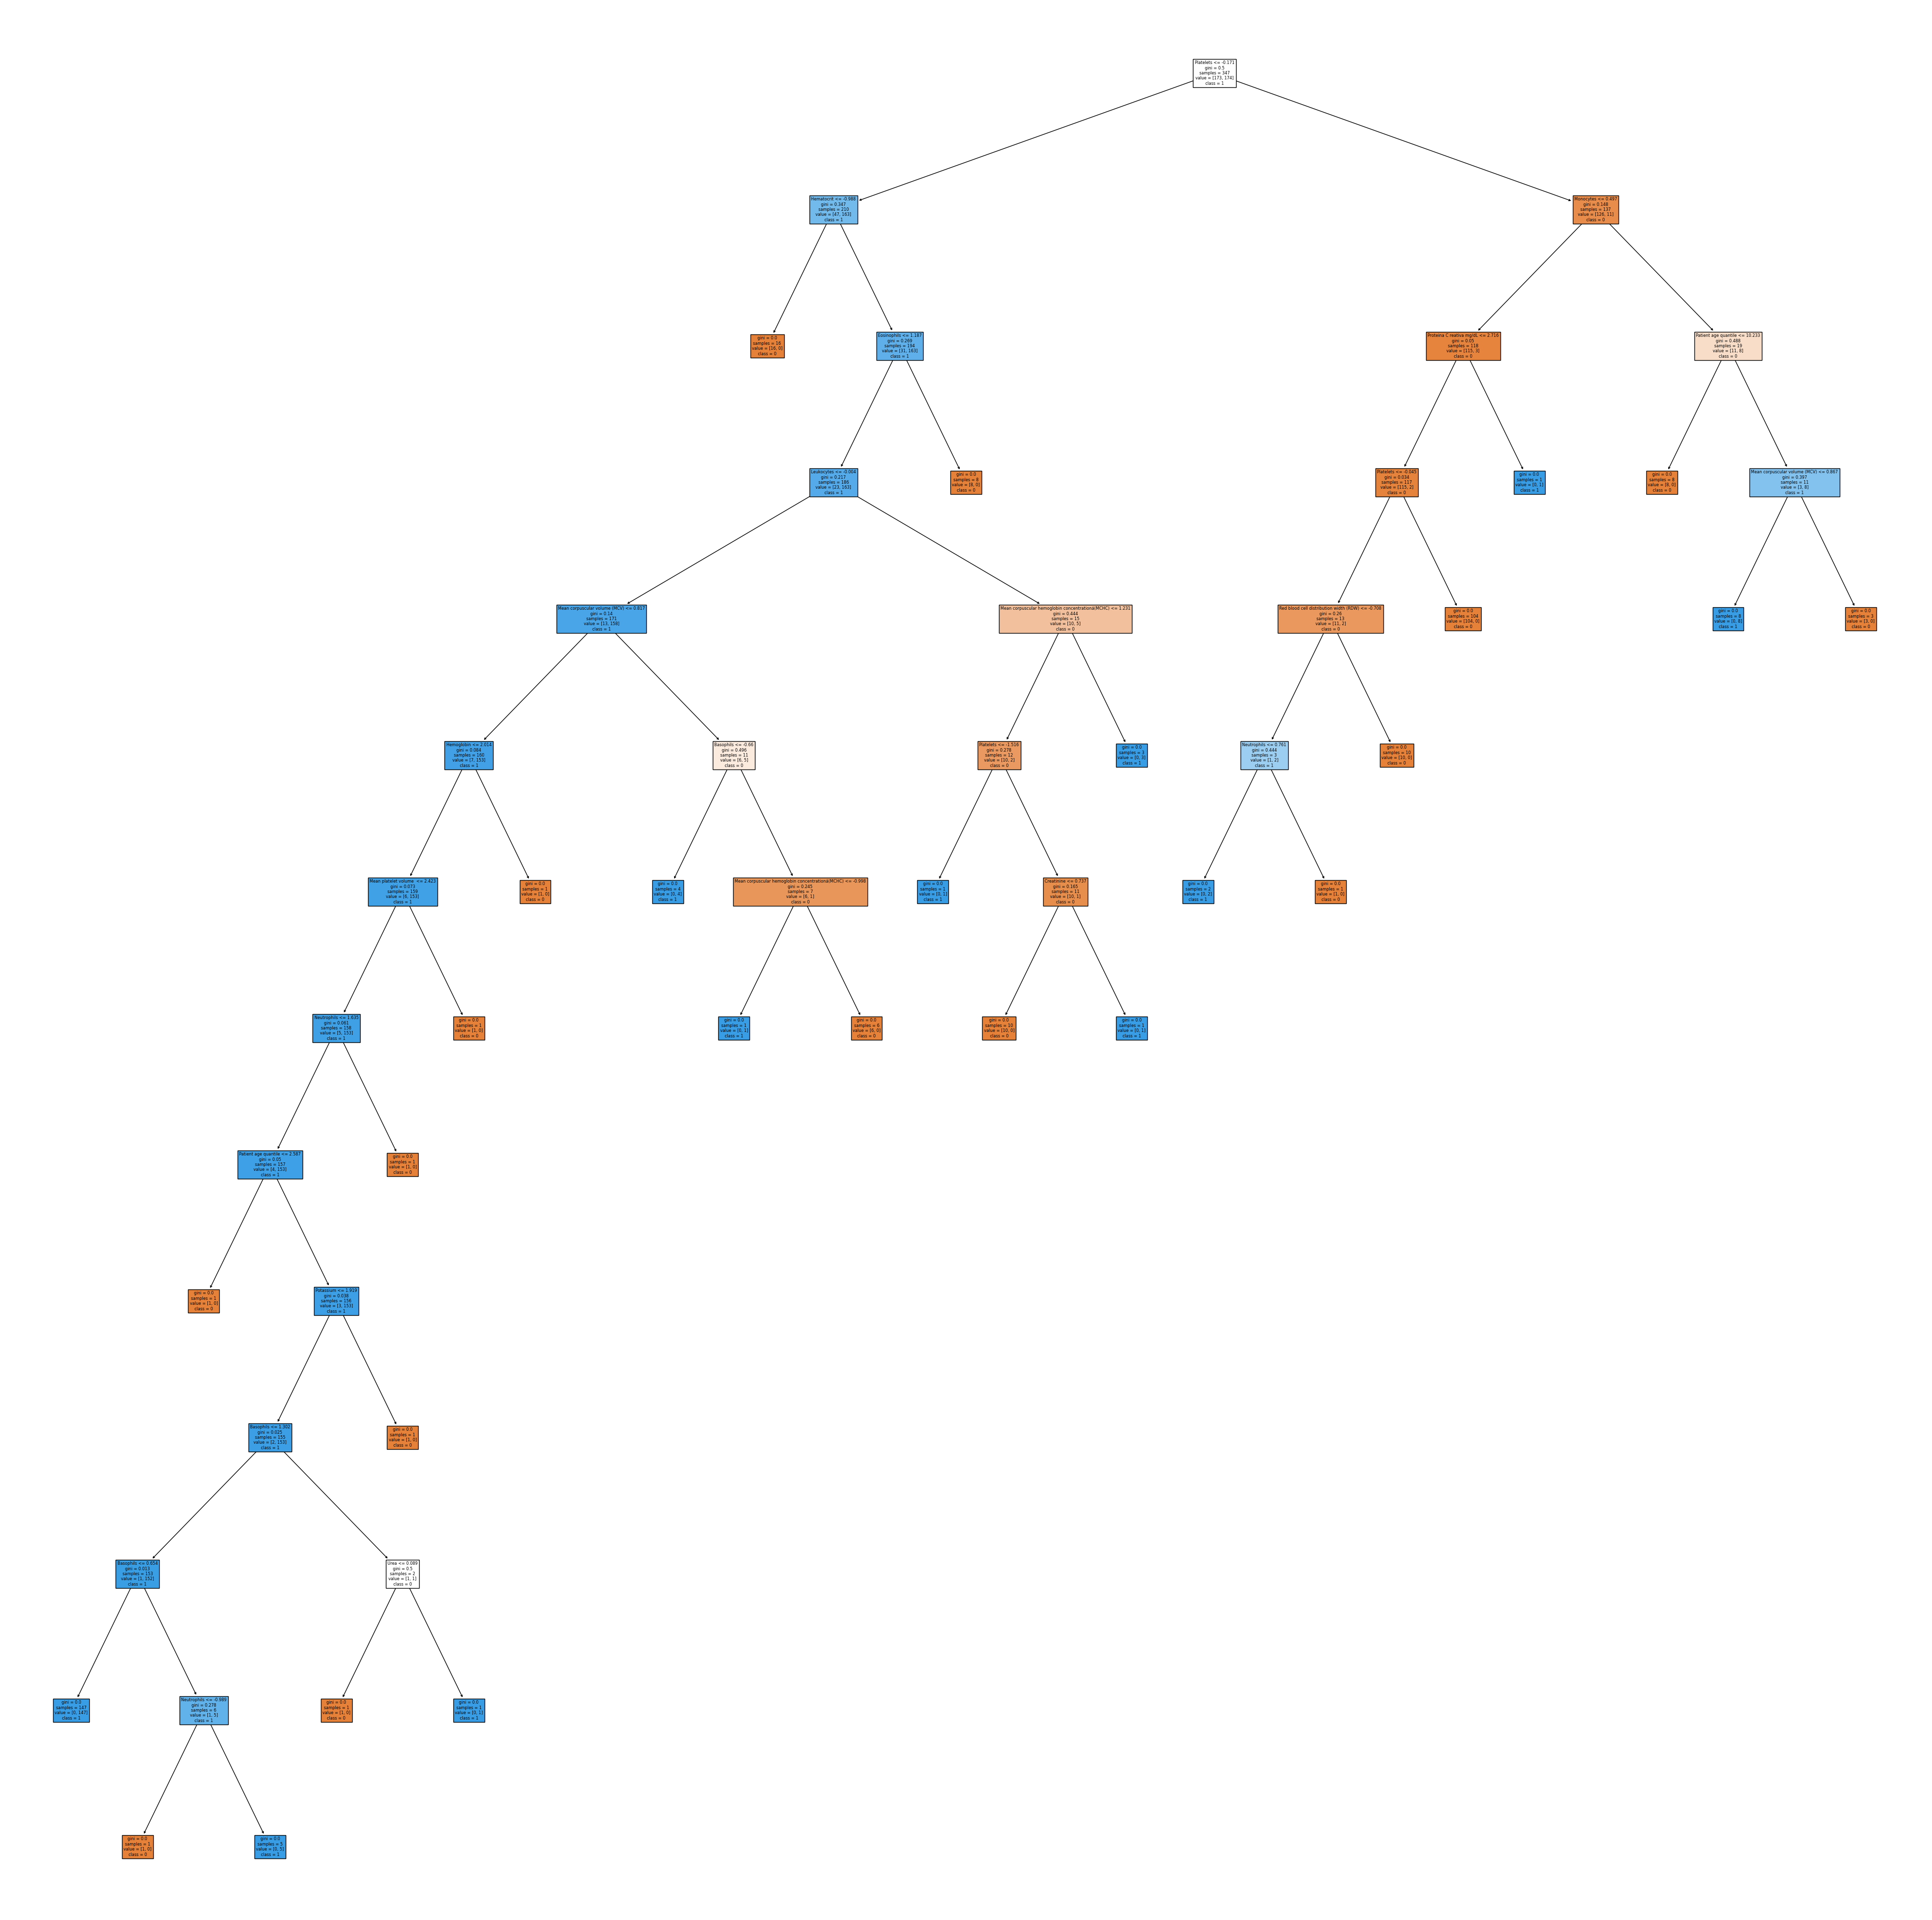

In [59]:
fig = plt.figure(figsize=(50, 50)) 
_ = tree.plot_tree(clf, feature_names=list(X_train.columns), class_names=['0','1'],filled=True)
fig.savefig('decision_tree.jpg')

In [60]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.896551724137931


In [61]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 score
f1 = metrics.f1_score(y_test, y_pred)
print("F1 score:", f1)

# Area under the ROC curve (AUC-ROC)
probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probas[:, 1])
auc_roc = metrics.auc(fpr, tpr)
print("AUC-ROC:", auc_roc)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix)

# Classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("Classification report:")
print(classification_report)

Precision: 0.8863636363636364
Recall: 0.9069767441860465
F1 score: 0.896551724137931
AUC-ROC: 0.8966701902748414
Confusion matrix:
[[39  5]
 [ 4 39]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.89      0.91      0.90        43

    accuracy                           0.90        87
   macro avg       0.90      0.90      0.90        87
weighted avg       0.90      0.90      0.90        87



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, np.array(y_train).ravel())

y_pred = rfc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(np.array(y_test).ravel(), y_pred)
f1 = metrics.f1_score(np.array(y_test).ravel(), y_pred)
auc_roc = metrics.roc_auc_score(np.array(y_test).ravel(), y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)

# Use cross-validation to evaluate the performance of the classifier
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(rfc, X_train, np.array(y_train).ravel(), cv=5, scoring=scoring)

# Print the cross-validation results
print("Cross-validation results:")
for metric in scoring:
    scores = cv_results[f"test_{metric}"]
    print(f"{metric}: {np.mean(scores):.3f} (std={np.std(scores):.3f})")


Accuracy: 0.9770114942528736
Precision: 0.9767441860465116
Recall: 0.9767441860465116
F1 score: 0.9767441860465116
AUC-ROC: 0.9770084566596194
Cross-validation results:
accuracy: 0.937 (std=0.036)
precision: 0.952 (std=0.031)
recall: 0.920 (std=0.049)
f1: 0.935 (std=0.038)
roc_auc: 0.984 (std=0.010)


In [82]:
from sklearn.ensemble import BaggingClassifier


rfc = RandomForestClassifier(n_estimators=100)
clf_bag = BaggingClassifier(base_estimator=rfc, 
                            n_estimators=100, random_state=1)

In [84]:
clf_bag = clf_bag.fit(X_train, np.array(y_train).ravel())
y_pred = clf_bag.predict(X_test)
print(accuracy_score(bag_pred, y_test))

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9655172413793104


In [85]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(np.array(y_test).ravel(), y_pred)
f1 = metrics.f1_score(np.array(y_test).ravel(), y_pred)
auc_roc = metrics.roc_auc_score(np.array(y_test).ravel(), y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9655172413793104
Precision: 0.9545454545454546
Recall: 0.9767441860465116
F1 score: 0.9655172413793104
AUC-ROC: 0.9656448202959831


In [87]:
from scipy.sparse import rand
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#lr = LogisticRegression(max_iter=1500, random_state=1)
dt = DecisionTreeClassifier()

ada_dt = AdaBoostClassifier(base_estimator=dt, n_estimators=100, random_state=1)
bagging_dt = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=1)
clf_rf = RandomForestClassifier(n_estimators=100)
clf_gdb = GradientBoostingClassifier(n_estimators=100)

models = []
models.append(('ada_lr', ada_dt))
models.append(('bagging_lr', bagging_dt))
models.append(('random forest', clf_rf))
models.append(('Gradient Boost', clf_gdb))

for name, model in models:
    results = cross_val_score(model, X, np.array(y).ravel(), cv=10)
    print(f'{name}:{np.mean(results)}')

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWar

ada_lr:0.889323467230444


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWar

bagging_lr:0.9262156448202961
random forest:0.9608879492600423
Gradient Boost:0.9399048625792812


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, np.array(y_train).ravel())

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.947983193277311
